In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, Birch, DBSCAN



genres = ["Action", "Adventure", "Animation", "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
raitings = pd.read_csv("data/ratings.csv")
movies = pd.read_csv("data/movies.csv")
for i, v in enumerate(genres):
    movies[i] = movies['genres'].str.contains(v)
# tags = pd.read_csv("data/tags.csv")

movies = movies.merge(raitings.groupby('movieId')['rating'].agg([pd.np.mean]), how='left', on='movieId')
movies.head()

,movieId,title,genres,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,2.861393
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,3.064592


In [3]:
raitingsExt = pd.merge(raitings, movies, on='movieId')
raitingsExt.head()

,userId,movieId,rating,timestamp,title,genres,0,1,2,3,...,9,10,11,12,13,14,15,16,17,mean
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy,False,True,False,True,...,False,False,False,False,False,False,False,False,False,3.211977
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy,False,True,False,True,...,False,False,False,False,False,False,False,False,False,3.211977
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy,False,True,False,True,...,False,False,False,False,False,False,False,False,False,3.211977
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy,False,True,False,True,...,False,False,False,False,False,False,False,False,False,3.211977
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy,False,True,False,True,...,False,False,False,False,False,False,False,False,False,3.211977


In [4]:
for i in range(18):
    raitingsExt[i] = raitingsExt[i] * (raitingsExt['rating'] - raitingsExt['mean']) 

raitingsExt.head()


,userId,movieId,rating,timestamp,title,genres,0,1,2,3,...,9,10,11,12,13,14,15,16,17,mean
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy,0.0,0.288023,0.0,0.288023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.211977
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy,-0.0,-0.211977,-0.0,-0.211977,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.211977
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy,-0.0,-0.211977,-0.0,-0.211977,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.211977
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy,-0.0,-0.211977,-0.0,-0.211977,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.211977
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy,-0.0,-0.211977,-0.0,-0.211977,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.211977


In [5]:
raitingsExt.groupby('userId')[list(range(18))].agg([pd.np.sum]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
userId,,,,,,,,,,,,,,,,,,
1,8.583763,23.340075,1.268256,4.354801,7.714318,-3.218277,0.000000,-4.995123,30.363226,0.000000,5.400946,0.101279,-3.649787,4.995371,6.156717,-0.246363,-1.258006,-2.645507
2,16.484880,18.311539,-0.535539,-0.535539,3.496416,1.116723,0.000000,7.477323,-1.727096,1.201123,12.101707,-0.922156,4.645854,1.235920,22.799388,17.697109,2.657483,1.568375
3,44.866783,37.280202,0.582179,10.103940,24.755092,10.382234,0.590787,27.997752,13.662524,-0.724308,21.034337,2.177717,8.426206,5.356955,67.350323,37.456983,3.866678,1.708757
4,2.994438,1.994179,0.889821,1.264086,4.082171,-0.140502,0.000000,2.637040,0.715103,0.000000,0.000000,0.889821,-2.279464,-0.617332,-2.021281,1.195766,-0.029000,0.589263
5,15.110605,18.118860,6.419458,7.466168,12.063877,1.847470,0.000000,13.151294,3.544698,0.000000,-1.177057,6.282155,0.143992,7.377482,8.980060,11.039945,-0.042534,2.860797


In [6]:
data = raitingsExt.drop(["timestamp", "title", "genres"], axis = 1)
data.head()

,userId,movieId,rating,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,mean
0,1,2,3.5,0.0,0.288023,0.0,0.288023,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.211977
1,5,2,3.0,-0.0,-0.211977,-0.0,-0.211977,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.211977
2,13,2,3.0,-0.0,-0.211977,-0.0,-0.211977,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.211977
3,29,2,3.0,-0.0,-0.211977,-0.0,-0.211977,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.211977
4,34,2,3.0,-0.0,-0.211977,-0.0,-0.211977,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.211977


## Przykłądowe dane:

In [7]:
raitingsExt.loc[(raitingsExt['userId'] == 1) & (raitingsExt['rating'] > 4)]

,userId,movieId,rating,timestamp,title,genres,0,1,2,3,...,9,10,11,12,13,14,15,16,17,mean
926291,1,1196,4.5,1112484742,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,0.311798,0.311798,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.311798,0.0,0.0,0.0,4.188202
971604,1,1198,4.5,1112484624,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,0.280991,0.280991,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.219009
2207284,1,4993,5.0,1112484682,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,0.000000,0.862075,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.137925
2281518,1,5952,5.0,1112484619,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,0.000000,0.892479,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.107521
2396003,1,7153,5.0,1112484633,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,0.857618,0.857618,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.142382
2473338,1,8507,5.0,1094786027,Freaks (1932),Crime|Drama|Horror,0.000000,0.000000,0.0,0.0,...,0.0,1.198708,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3.801292
2474576,1,8636,4.5,1112485493,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,0.948893,0.948893,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.948893,0.0,0.0,0.0,3.551107


## Próba grupowania filmów według gatunków (w seumie bez sensu)

In [8]:

test = movies.drop(["movieId", 'genres'], axis = 1)

data = test.loc[:, range(18)]
print(data.shape)

pca_model = PCA(n_components=2)
pca = pca_model.fit_transform(data)

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=100).fit(data)
birch = Birch(threshold=0.2, n_clusters=None).fit(data)
dbscan = DBSCAN(eps=0.999999, min_samples=25).fit(data)

(27278, 18)


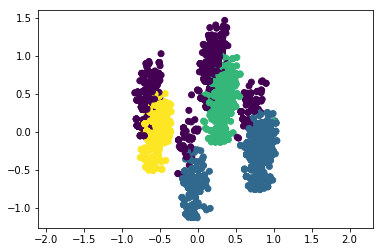

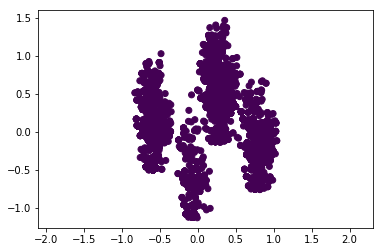

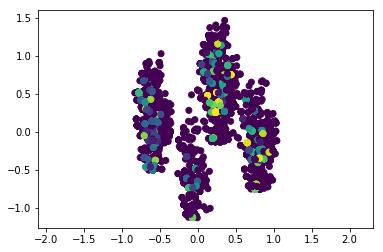

In [9]:
x, y = pca[:,0], pca[:,1]


plt.axis('equal')
plt.scatter(x,y, c=kmeans.labels_)
plt.show()

plt.axis('equal')
plt.scatter(x,y, c=birch.labels_)
plt.show()

plt.axis('equal')
plt.scatter(x,y, c=dbscan.labels_)
plt.show()